In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-server-access-logs/access.log
/kaggle/input/web-server-access-logs/client_hostname.csv


# Pre-processing the dataset

## Dataset choosen: ServerLOG1

**Import necessary modules**

In [2]:
import re
import os
from tqdm import tqdm

In [3]:
# Define combined regex pattern for parsing log lines
regex = '^(?P<client>\S+) \S+ (?P<userid>\S+) \[(?P<datetime>[^\]]+)\] "(?P<method>[A-Z]+) (?P<request>[^ "]+)? HTTP/[0-9.]+" (?P<status>[0-9]{3}) (?P<size>[0-9]+|-) "(?P<referrer>[^"]*)" "(?P<useragent>[^"]*)'

# Define column names for parsed log data
columns = ['client', 'userid', 'datetime', 'method', 'request', 'status', 'size', 'referer', 'user_agent']

**Function to Parse Log Files and Save to DataFrame**

In [4]:
def logs_to_df(logfile, output_dir, errors_file):
    """
    Parse log file and save parsed data into DataFrame, then save DataFrame to Parquet files.

    Args:
        logfile (str): Path to the log file.
        output_dir (str): Directory to save Parquet files.
        errors_file (str): Path to the file to store parsing errors.

    Returns:
        None
    """
    with open(logfile) as source_file:
        linenumber = 0
        parsed_lines = []
        for line in tqdm(source_file):
            try:
                log_line = re.findall(regex, line)[0]
                parsed_lines.append(log_line)
            except Exception as e:
                with open(errors_file, 'at') as errfile:
                    print((line, str(e)), file=errfile)
                continue
            linenumber += 1
            if linenumber % 250_000 == 0:
                df = pd.DataFrame(parsed_lines, columns=columns)
                df.to_parquet(f'{output_dir}/file_{linenumber}.parquet')
                parsed_lines.clear()
        else:
            df = pd.DataFrame(parsed_lines, columns=columns)
            df.to_parquet(f'{output_dir}/file_{linenumber}.parquet')
            parsed_lines.clear()

In [5]:
# Create a directory to store Parquet files
!mkdir df_dir

In [6]:
# Parse log file and save parsed data into DataFrame, then save DataFrame to Parquet files
logs_to_df(logfile='/kaggle/input/web-server-access-logs/access.log', output_dir='df_dir/', errors_file='errors.txt')

10365152it [01:45, 97971.11it/s] 


**Reading Parquet Files into DataFrame**

In [7]:
# Read Parquet files into a DataFrame
logs_df = pd.read_parquet('df_dir/')

In [8]:
# Retrieve the shape of the DataFrame (number of rows and columns)
logs_df.shape

(10364865, 9)

**Setting Display Options for being able to see the complete content of each cell for better understanding**

In [9]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)    # Show all rows
pd.set_option('display.max_colwidth', None) # Allow wrapping for long values

In [10]:
# Display the first few rows of the DataFrame
logs_df.head()

,client,userid,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,-,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.jpg&wh=50x50,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
1,37.152.163.59,-,22/Jan/2019:12:38:27 +0330,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
2,85.9.73.119,-,22/Jan/2019:12:38:27 +0330,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head.css,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"
3,37.152.163.59,-,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.jpg&wh=50x50,200,1457,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
4,85.9.73.119,-,22/Jan/2019:12:38:27 +0330,GET,/static/images/checked.png,200,1083,https://znbl.ir/static/bundle-bundle_site_head.css,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"


In [11]:
# Display information about the DataFrame, including data types and memory usage
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10364865 entries, 0 to 10364864
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   client      object
 1   userid      object
 2   datetime    object
 3   method      object
 4   request     object
 5   status      object
 6   size        object
 7   referer     object
 8   user_agent  object
dtypes: object(9)
memory usage: 711.7+ MB


In [12]:
# Generate descriptive statistics for numerical columns in the DataFrame
logs_df.describe()

,client,userid,datetime,method,request,status,size,referer,user_agent
count,10364865,10364865,10364865,10364865,10364865,10364865,10364865,10364865,10364865
unique,258445,2,400107,6,893045,15,69707,103238,28339
top,66.249.66.194,-,26/Jan/2019:19:07:39 +0330,GET,/settings/logo,200,0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"
freq,353483,10364863,368,10189772,352047,9579824,770606,1646072,746572


**Counting Missing or Null Values**

In [13]:
# Count the number of missing values in each column of the DataFrame
logs_df.isnull().sum()

client        0
userid        0
datetime      0
method        0
request       0
status        0
size          0
referer       0
user_agent    0
dtype: int64

**Counting Unique Values**

In [14]:
# Count the number of unique values in each column of the DataFrame to check for duplicates
logs_df.nunique()

client        258445
userid             2
datetime      400107
method             6
request       893045
status            15
size           69707
referer       103238
user_agent     28339
dtype: int64

**Dropping userid Column because it only has 2 values**

In [15]:
# Print unique values in the 'userid' column and then drop the column from the DataFrame
print(logs_df['userid'].unique())

logs_df.drop(columns=['userid'], inplace=True)
# if method, status are not needed they can also be dropped for better results

['-' 'admin']


**Removing Duplicated rows from the dataframe**

In [16]:
# Check for and remove duplicated rows in the DataFrame, if any
if logs_df.duplicated().sum():
    logs_df = logs_df.drop_duplicates()

In [17]:
# Count the number of unique values in each column of the DataFrame after removing duplicates
logs_df.nunique()

client        258445
datetime      400107
method             6
request       893045
status            15
size           69707
referer       103238
user_agent     28339
dtype: int64

# Plotting graphs for deeper understanding

In [18]:
import matplotlib.pyplot as plt 
#importing for plotting graphs

**Visualizing Value Counts for Selected Columns**

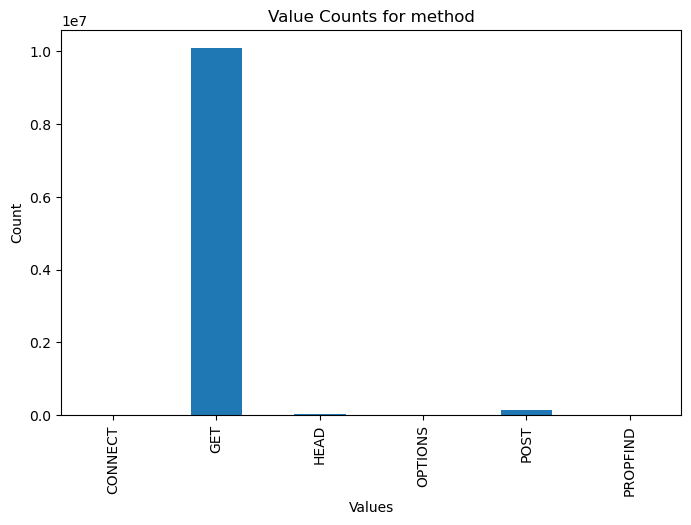

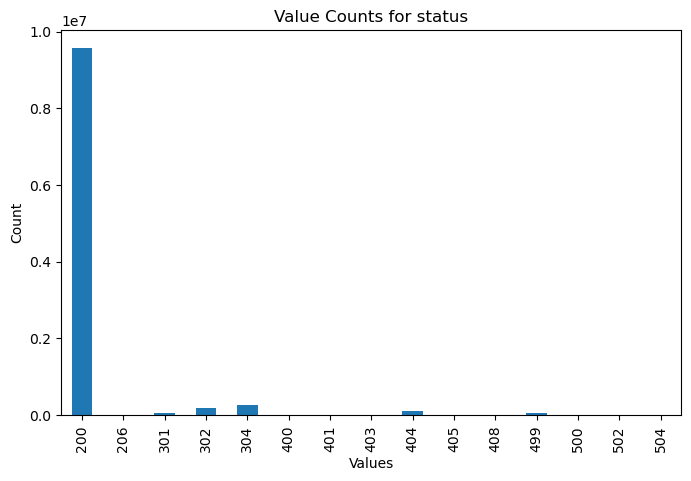

In [19]:
# Define columns for which value counts will be calculated and visualized
cols = ['method', 'status']

# Iterating through each column
for col in cols:
    # Count the occurrences of each value in the column
    value_counts = logs_df[col].value_counts()
    
    # Sort the values for better visualization
    value_counts_sorted = value_counts.sort_index()
    
    # Plot
    plt.figure(figsize=(8, 5))
    value_counts_sorted.plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()

The values in the **method and status** columns can be neglected because **GET and status 200** are the prominent features, only if the other values are of no use for model training and development.

In [20]:
# Create a copy of the DataFrame for generating request vs time graphs
df_samp = logs_df.copy()

In [21]:
# Retrieve the shape of the sampled DataFrame (number of rows and columns)
df_samp.shape

(10256742, 8)

In [22]:
# Extract the month component from the 'datetime' column and count the number of unique months
months_list = df_samp['datetime'].apply(lambda x: x.split('/')[1])
print(months_list.nunique())

1


In [23]:
#Convert string datetime to Timestamp
df_samp['datetime'] = df_samp['datetime'].apply(lambda x: x.split('+')[0][:-1]) #remove the extra part i.e. + 3:30 from the datetime column
df_samp['datetime'] = df_samp.datetime.apply(lambda x: x.replace('Jan', '01')) #since the data given is only for jan
df_samp['datetime'] = pd.to_datetime(df_samp.datetime, format='%d/%m/%Y:%H:%M:%S')

In [24]:
#segregate datetime columns into distinct groups

df_samp['day'] = df_samp['datetime'].apply(lambda x: x.day)
df_samp['hour'] = df_samp['datetime'].apply(lambda x: x.hour)
df_samp['minute'] = df_samp['datetime'].apply(lambda x: x.minute)

In [25]:
# Display the first few rows of the sampled DataFrame
df_samp.head()

,client,datetime,method,request,status,size,referer,user_agent,day,hour,minute
0,37.152.163.59,2019-01-22 12:38:27,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.jpg&wh=50x50,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko,22,12,38
1,37.152.163.59,2019-01-22 12:38:27,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko,22,12,38
2,85.9.73.119,2019-01-22 12:38:27,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head.css,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36",22,12,38
3,37.152.163.59,2019-01-22 12:38:27,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.jpg&wh=50x50,200,1457,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko,22,12,38
4,85.9.73.119,2019-01-22 12:38:27,GET,/static/images/checked.png,200,1083,https://znbl.ir/static/bundle-bundle_site_head.css,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36",22,12,38


**Aggregating Data by Minute and Hour and plotting Load Trends by Minute and Hour**

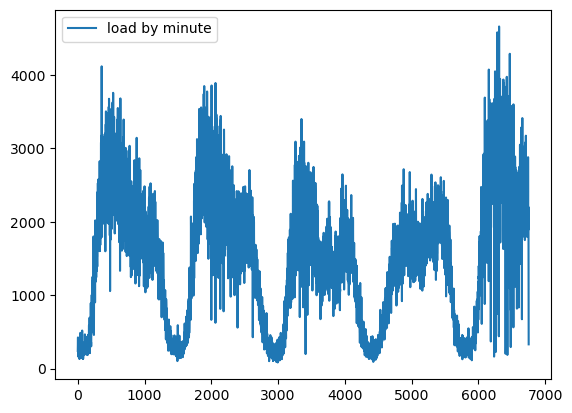

In [26]:
# Plotting data requests vs minute
aggByMin = df_samp.groupby(['day', 'hour', 'minute'], as_index=False).agg('count')\
  .rename({'client': 'count'}, axis=1).drop(['datetime', 'request'], axis=1)

plt.plot(aggByMin['count'], label='load by minute')
plt.legend()

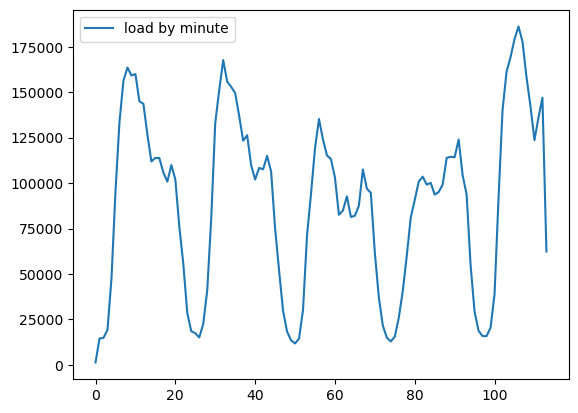

In [27]:
# Plotting data requests per hour
aggByHour = df_samp.groupby(['day', 'hour'], as_index=False).agg('count')\
  .rename({'client': 'count'}, axis=1).drop(['datetime', 'request', 'minute'], axis=1)

plt.plot(aggByHour['count'], label='load by minute')
plt.legend()

# Methods for Anonymization

**I have implemented 11 methods for Anonymization which can be extended and integrated to work as a full-fledged service for NLP based solutions to anonymize PII  (personally identifiable information) in datasets**

# 1) Manual Anonymization

This is my simplest approach for handling the anonymization process

In [28]:
# Import datetime module
from datetime import datetime

In [29]:
# Create a sampled copy of the DataFrame
df1 = logs_df.sample(50).copy()

In [31]:
# Display the first few rows of the sampled DataFrame
df1.head(2)

,client,datetime,method,request,status,size,referer,user_agent
9156519,5.115.78.210,26/Jan/2019:08:43:41 +0330,GET,/image/46210/productModel/150x150,200,2711,https://www.zanbil.ir/browse/meat-grinder/%DA%86%D8%B1%D8%AE-%DA%AF%D9%88%D8%B4%D8%AA,Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20100101 Firefox/64.0
9554803,79.127.97.188,26/Jan/2019:11:22:59 +0330,GET,/static/images/guarantees/bestPrice.png,200,7356,https://www.zanbil.ir/browse/home-appliances/%D9%84%D9%88%D8%A7%D8%B2%D9%85-%D8%AE%D8%A7%D9%86%DA%AF%DB%8C,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"


In [32]:
# Convert DataFrame columns to a list
col_list = df1.columns.to_list()
print(col_list)

['client', 'datetime', 'method', 'request', 'status', 'size', 'referer', 'user_agent']


**Sanitizing Timestamps**

In [38]:
def sanitize_timestamp(timestamp):
    """
    Convert timestamp string to a numerical representation.

    Args:
        timestamp (str): Timestamp string in the format '%d/%b/%Y:%H:%M:%S %z'.

    Returns:
        float: Numerical representation of the timestamp.
    """
    # Define a dictionary to map month abbreviations to numerical representation; although here only data for Jan month is given, this is a general approach.
    month_mapping = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
        'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
        'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }

    # Parse the date string
    dt = datetime.strptime(timestamp, '%d/%b/%Y:%H:%M:%S %z')

    # Extract numerical components
    year = str(dt.year)
    month = month_mapping[dt.strftime('%b')]
    day = str(dt.day)
    hour = str(dt.hour)
    minute = str(dt.minute)
    second = str(dt.second)

    # Concatenate components
    date_number = year + month + day + hour + minute + second

    return int(date_number)/1e14

**Sanitizing Data: IP Addresses and Request URLs**

In [39]:
# Function to sanitize IP addresses
def sanitize_ip(ip):
    converted_int = int(ip.replace('.', ''))
    return converted_int/1e10

# Function to sanitize request URLs
def sanitize_request(request):
    # this regex pattern can be customized based on the specific URL structure
    return re.sub(r'GET|POST|PUT|DELETE\s+(\/[^\s]+)\s+HTTP', r'GET /sanitized_url HTTP', request)

**Mapping HTTP Methods to Numerical Labels**

In [40]:
method_labels = {
    'GET' : 1,
    'HEAD' : 2,
    'POST' : 3,
    'OPTIONS' : 4,
    'CONNECT' : 5,
    'PROPFIND' : 6,
}

# Replace method codes with labels
df1["method"] = df1["method"].map(method_labels)

**Applying Sanitization Functions to DataFrame Columns**

In [41]:
# Apply sanitization functions to DataFrame columns
df1['client'] = df1['client'].apply(sanitize_ip)
df1['datetime'] = df1['datetime'].apply(sanitize_timestamp)
df1['request'] = df1['request'].apply(sanitize_request)

In [42]:
# Remove rows with requests containing specific file extensions from the DataFrame, to remove generic requests
df1 = df1.query("request.str.contains('.css') == False and request.str.contains('.png') == False and request.str.contains('.jpg') == False and request.str.contains('.jpeg') == False and request.str.contains('.mp3') == False and request.str.contains('.js') == False")

In [43]:
# Print sanitized and anonymized DataFrame
df1.sample(5)

,client,datetime,method,request,status,size,referer,user_agent
9156519,0.051158,0.020190,1,/image/46210/productModel/150x150,200,2711,https://www.zanbil.ir/browse/meat-grinder/%DA%86%D8%B1%D8%AE-%DA%AF%D9%88%D8%B4%D8%AA,Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20100101 Firefox/64.0
3131438,1.851098,0.201901,1,/image/872/productModel/100x100,200,1214,https://www.zanbil.ir/product/8492/62363/,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0
8782711,0.919923,0.201901,1,/image/31327/productModel/200x200,200,6131,https://www.zanbil.ir/m/filter/p4?page=2,"Mozilla/5.0 (Linux; Android 4.4.2; SM-G900H Build/KOT49H) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.81 Mobile Safari/537.36"
4504465,2.041821,0.020190,1,/image/11671/productType/240x180,200,17046,https://www.zanbil.ir/m/index?utm_medium=26&utm_campaign=Z&utm_source=2&utm_term=205,"Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-A310F Build/NRD90M) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/5.2 Chrome/51.0.2704.106 Mobile Safari/537.36"
8171393,0.831215,0.020190,1,/settings/logo,200,4120,https://www.zanbil.ir/m/product/33960/64746/%DA%AF%D9%88%D8%B4%DB%8C-%D9%85%D9%88%D8%A8%D8%A7%DB%8C%D9%84-%D8%B3%D8%A7%D9%85%D8%B3%D9%88%D9%86%DA%AF-%D9%85%D8%AF%D9%84-Galaxy-J6-%282018%29-Dual-32GB-%28J600F-DS%29,"Mozilla/5.0 (Linux; Android 7.0; SM-G920F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36"


# 2) Label Encoding columns by thresholding and grouping

In [45]:
df2 = logs_df.sample(50000).copy()
df2.head()

,client,datetime,method,request,status,size,referer,user_agent
6901407,66.249.66.91,25/Jan/2019:02:44:37 +0330,GET,/filter/b481%2Cb43%2Cb874%2Cb32%2Cb67%2Cb36%2Cb226%2Cb41%2Cb136%2Cb570%2Cb615%2Cb168%2Cb648%2Cb148%2Cb80%2Cb597%2Cb724%2Cb613%2Cb5%2Cb135%2Cb877%2Cb183%2Cb435%2Cb194%2Cb1%2Cb861%2Cb256%2Cb854%2Cb198%2Cb656%2Cb647%2Cb679%2Cb3%2Cb202%2Cb20%2Cb542%2Cb723%2Cb482%2Cb212%2Cb573%2Cb441%2Cb35%2Cb546%2Cb400%2Cb879%2Cb8%2Cb151?page=7,200,40538,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
8341021,5.106.234.88,25/Jan/2019:19:59:09 +0330,GET,/image/11671/productType/240x180,200,17046,https://www.zanbil.ir/m,"Mozilla/5.0 (Linux; Android 5.0.2; HTC One E9PLUS dual sim Build/LRX22G) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.89 Mobile Safari/537.36"
4628328,66.249.66.94,24/Jan/2019:00:18:07 +0330,GET,/static/css/font/wyekan/font.woff,304,0,-,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
8794161,89.199.13.86,25/Jan/2019:23:51:59 +0330,GET,/image/47376/productModel/150x150,200,4707,https://www.zanbil.ir/browse/art-music/%D9%87%D9%86%D8%B1-%D9%88-%D9%85%D9%88%D8%B3%DB%8C%D9%82%DB%8C,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0
4217346,5.216.178.107,23/Jan/2019:20:31:00 +0330,POST,/m/updateVariation?__amp_source_origin=https%3A%2F%2Fwww.zanbil.ir,200,347,https://www.zanbil.ir/m/product/8692/11102/%D8%A8%D8%AE%D8%A7%D8%B1%DB%8C-%DA%AF%D8%A7%D8%B2%DB%8C-%D8%A8%D8%A7-%D8%AF%D9%88%D8%AF%DA%A9%D8%B4-%D9%86%DB%8C%DA%A9-%DA%A9%D8%A7%D9%84%D8%A7-%D9%85%D8%AF%D9%84-%D9%87%D9%88%D8%B4%D9%85%D9%86%D8%AF-AB7?utm_medium=PPC&utm_source=Torob,"Mozilla/5.0 (Linux; Android 7.0; TECNO AX8) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.80 Mobile Safari/537.36"


**Classifying Traffic Based on Referer**

In [46]:
# Convert 'referer' column values to lowercase
df2['referer'] = df2['referer'].str.lower()

# Function to classify traffic based on referer
def classify_traffic(referrer):
    if '-' in referrer and len(referrer) < 2:
        return 'direct'
    elif any(keyword in referrer.lower() for keyword in ['google', 'bing', 'yahoo','yandex','baidu','torob','search']):
        return 'search'
    elif any(keyword in referrer.lower() for keyword in ['facebook', 'twitter', 'linkedin','instagram','pinterest','youtube','reddit','ask','telegram']):
        return 'social'
    else:
        return 'other'

# Apply traffic classification function to create a new column 'traffic-label'   
df2['traffic-label'] = df2['referer'].apply(classify_traffic)

**Extracting Network Location (Netloc) from Referer URLs**


In [47]:
# Import necessary module for URL parsing
from urllib.parse import urlparse

# Function to extract the network location (netloc) from a URL
def extract_netloc(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

# Apply the function to create a new column 'ref' containing the netloc
df2['ref'] = df2['referer'].apply(extract_netloc)

# Display the first few rows of the DataFrame
df2.head(2)

,client,datetime,method,request,status,size,referer,user_agent,traffic-label,ref
6901407,66.249.66.91,25/Jan/2019:02:44:37 +0330,GET,/filter/b481%2Cb43%2Cb874%2Cb32%2Cb67%2Cb36%2Cb226%2Cb41%2Cb136%2Cb570%2Cb615%2Cb168%2Cb648%2Cb148%2Cb80%2Cb597%2Cb724%2Cb613%2Cb5%2Cb135%2Cb877%2Cb183%2Cb435%2Cb194%2Cb1%2Cb861%2Cb256%2Cb854%2Cb198%2Cb656%2Cb647%2Cb679%2Cb3%2Cb202%2Cb20%2Cb542%2Cb723%2Cb482%2Cb212%2Cb573%2Cb441%2Cb35%2Cb546%2Cb400%2Cb879%2Cb8%2Cb151?page=7,200,40538,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),direct,
8341021,5.106.234.88,25/Jan/2019:19:59:09 +0330,GET,/image/11671/productType/240x180,200,17046,https://www.zanbil.ir/m,"Mozilla/5.0 (Linux; Android 5.0.2; HTC One E9PLUS dual sim Build/LRX22G) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.89 Mobile Safari/537.36",other,www.zanbil.ir


In [49]:
# Print the count of unique network locations (netloc) in the 'ref' column
print(df2['ref'].value_counts())

www.zanbil.ir                              38708
                                            7625
znbl.ir                                     1871
torob.com                                    603
www.google.com                               529
www-zanbil-ir.cdn.ampproject.org             458
emalls.ir                                     43
api.torob.com                                 21
zanbil.ir                                     21
ptcnovin.com                                  15
com.google.android.googlequicksearchbox       10
www.garda.ir                                  10
irantradeco.ir                                 6
www.samsungcenter.ir                           5
www.asire20.ir                                 5
www.khanesazan.com                             4
www.ask.ir                                     4
www.ptcnovin.com                               3
homepars.com                                   3
www-isna-ir.cdn.ampproject.org                 3
www.google.co.uk    

**Grouping Similar URLs and Finding Canonical URLs**

In [50]:
# Import fuzzy matching modules
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

threshold = 75  # Similarity threshold
# Initialize a new column for canonical URLs
df2['refers'] = ''

# Function to compare URLs based on their similarity
def compare_urls(url1, url2):
    return fuzz.ratio(url1, url2)

# Dictionary to track the correspondence of canonical URL to a group of similar URLs
canonical_urls = {}

for idx, url in enumerate(df2['ref']):
    # Finding the canonical URL in the existing dictionary
    canonical_url = None
    for key, value in canonical_urls.items():
        if compare_urls(url, key) >= threshold:
            canonical_url = key
            break
    
    if canonical_url is None:
        # Creating a new group with the canonical URL
        canonical_url = url
        canonical_urls[canonical_url] = canonical_url
    
    # Adding the canonical URL to the 'refers' column
    df2.at[idx, 'refers'] = canonical_url

In [51]:
print(df2['refers'].value_counts())
# Print the count of occurrences of each canonical URL in the 'refers' column

                                           57406
www.zanbil.ir                              38733
znbl.ir                                     1871
torob.com                                    624
www.google.com                               542
www-zanbil-ir.cdn.ampproject.org             461
emalls.ir                                     43
www.ptcnovin.com                              18
www.garda.ir                                  10
com.google.android.googlequicksearchbox       10
irantradeco.ir                                 6
www.isna.ir                                    6
www.asire20.ir                                 5
www.samsungcenter.ir                           5
r.search.yahoo.com                             4
www.khanesazan.com                             4
matching.torob.com                             3
homepars.com                                   3
translate.googleusercontent.com                3
bpm.shaparak.ir                                3
saten.ir            

**Filtering Rarely Occurring URLs**

In [56]:
url_counts = df2['refers'].value_counts()

# Select URLs that occur less than 10 times
less_than_10_counts = url_counts[url_counts < 10]

# Output the number of unique URLs that occur less than 10 times i.e. rarely
unique_urls_less_than_10 = len(less_than_10_counts)
print("Number of unique URLs that occur less than 10 times:", unique_urls_less_than_10)
df2 = df2[df2['refers'].isin(less_than_10_counts.index) == False]

Number of unique URLs that occur less than 10 times: 25


**Identifying Frequently Occurring URLs**

In [57]:
# Count occurrences of each URL in the 'ref' column
url_counts = df2['ref'].value_counts()

# Select URLs that occur more than 50 times
more_than_50_counts = url_counts[url_counts > 50]

# Output the list of unique URLs that occur more than 50 times i.e. frequently
unique_urls_more_than_50 = more_than_50_counts.index.tolist()

# Print the list of unique URLs that occur more than 50 times
print("List of unique URLs that occur more than 50 times:")
print(unique_urls_more_than_50)

List of unique URLs that occur more than 50 times:
['www.zanbil.ir', '', 'znbl.ir', 'torob.com', 'www.google.com', 'www-zanbil-ir.cdn.ampproject.org']


**Encoding Referer URLs**

In [58]:
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Import LabelEncoder from sklearn.preprocessing
encoder = LabelEncoder()

# Encode the 'refers' column and create a new column 'encoded_refers' with the encoded values
df2.loc[:, 'encoded_refers'] = encoder.fit_transform(df2['refers'])

# Output unique codes and the number of unique URL addresses
unique_codes = df2['encoded_refers'].unique()
num_unique_urls = len(unique_codes)

print("Unique codes:", unique_codes)
print("Number of unique URL addresses:", num_unique_urls)

Unique codes: [0 8 9 3 6 4 1 2 5 7]
Number of unique URL addresses: 10


/tmp/ipykernel_33/3462920569.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'encoded_refers'] = encoder.fit_transform(df2['refers'])


**Encoding Status, Method, and Traffic Labels**

In [59]:
# Encode 'status' column and create a new column 'encoded_status'
df2.loc[:, 'encoded_status'] = encoder.fit_transform(df2['status'])

# Encode 'method' column and create a new column 'encoded_method'
df2.loc[:, 'encoded_method'] = encoder.fit_transform(df2['method'])

# Encode 'traffic-label' column
df2['traffic-label'] = encoder.fit_transform(df2['traffic-label'])

# Print the count of occurrences of each encoded traffic label
print(df2['traffic-label'].value_counts())

4    49718
1    39940
0     7625
2     2200
3      235
Name: traffic-label, dtype: int64


/tmp/ipykernel_33/2235590112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'encoded_status'] = encoder.fit_transform(df2['status'])
/tmp/ipykernel_33/2235590112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'encoded_method'] = encoder.fit_transform(df2['method'])
/tmp/ipykernel_33/2235590112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [60]:
# Remove rows with missing values
df2 = df2.dropna()

In [61]:
# Display the first few rows of the DataFrame after removing rows with missing values
df2.head()

,client,datetime,method,request,status,size,referer,user_agent,traffic-label,ref,refers,encoded_refers,encoded_status,encoded_method
6901407,66.249.66.91,25/Jan/2019:02:44:37 +0330,GET,/filter/b481%2Cb43%2Cb874%2Cb32%2Cb67%2Cb36%2Cb226%2Cb41%2Cb136%2Cb570%2Cb615%2Cb168%2Cb648%2Cb148%2Cb80%2Cb597%2Cb724%2Cb613%2Cb5%2Cb135%2Cb877%2Cb183%2Cb435%2Cb194%2Cb1%2Cb861%2Cb256%2Cb854%2Cb198%2Cb656%2Cb647%2Cb679%2Cb3%2Cb202%2Cb20%2Cb542%2Cb723%2Cb482%2Cb212%2Cb573%2Cb441%2Cb35%2Cb546%2Cb400%2Cb879%2Cb8%2Cb151?page=7,200,40538,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),0,,,0,0,0
8341021,5.106.234.88,25/Jan/2019:19:59:09 +0330,GET,/image/11671/productType/240x180,200,17046,https://www.zanbil.ir/m,"Mozilla/5.0 (Linux; Android 5.0.2; HTC One E9PLUS dual sim Build/LRX22G) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.89 Mobile Safari/537.36",1,www.zanbil.ir,,0,0,0
4628328,66.249.66.94,24/Jan/2019:00:18:07 +0330,GET,/static/css/font/wyekan/font.woff,304,0,-,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)",0,,,0,3,0
8794161,89.199.13.86,25/Jan/2019:23:51:59 +0330,GET,/image/47376/productModel/150x150,200,4707,https://www.zanbil.ir/browse/art-music/%d9%87%d9%86%d8%b1-%d9%88-%d9%85%d9%88%d8%b3%db%8c%d9%82%db%8c,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0,1,www.zanbil.ir,,0,0,0
4217346,5.216.178.107,23/Jan/2019:20:31:00 +0330,POST,/m/updateVariation?__amp_source_origin=https%3A%2F%2Fwww.zanbil.ir,200,347,https://www.zanbil.ir/m/product/8692/11102/%d8%a8%d8%ae%d8%a7%d8%b1%db%8c-%da%af%d8%a7%d8%b2%db%8c-%d8%a8%d8%a7-%d8%af%d9%88%d8%af%da%a9%d8%b4-%d9%86%db%8c%da%a9-%da%a9%d8%a7%d9%84%d8%a7-%d9%85%d8%af%d9%84-%d9%87%d9%88%d8%b4%d9%85%d9%86%d8%af-ab7?utm_medium=ppc&utm_source=torob,"Mozilla/5.0 (Linux; Android 7.0; TECNO AX8) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.80 Mobile Safari/537.36",2,www.zanbil.ir,,0,0,3


# 3) Presidio

**Installing Required Packages: presidio-analyzer and presidio-anonymizer**

In [69]:
df3 = logs_df.head(5).copy()
df3.head(2)

,client,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.jpg&wh=50x50,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
1,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko


In [70]:
!pip install presidio-analyzer presidio-anonymizer

**Import necessary modules**

In [71]:
import re
from presidio_anonymizer import AnonymizerEngine
from presidio_anonymizer.entities import RecognizerResult, OperatorConfig
from presidio_analyzer import AnalyzerEngine, PatternRecognizer, Pattern

In [72]:
analyzer = AnalyzerEngine()       # Analyzer
anonymizer = AnonymizerEngine()   # Anonymizer

**Analyzing Text Data and Storing Results**

In [73]:
def analyze_and_store_results(df, analyzer):
    """
    Analyze text in each cell of the DataFrame and store the analysis results.

    Args:
        df (DataFrame): DataFrame containing text data to be analyzed.
        analyzer: Presidio Analyzer instance.

    Returns:
        DataFrame: DataFrame containing the analysis results.
    """
    results_list = []
    for index, row in df.iterrows():
        row_results = []
        for col in df.columns:
            try:
              # Analyze text in each cell and store the analysis output

                analyzer_result = analyzer.analyze(text=row[col],
                                                   entities=['PERSON', 'PHONE_NUMBER', 'EMAIL_ADDRESS', 'URL'],
                                                   language='en',
                                                   return_decision_process=True)
                row_results.append(analyzer_result)  # Store the entire analysis output for flexibility
            except Exception as e:
                print(f"Error analyzing row {index}, column {col}: {e}")
                # Handle errors as needed (e.g., store a placeholder value, log the error, etc.)
        results_list.append(row_results)
    
    # Create a DataFrame from the analysis results
    results_df = pd.DataFrame(results_list, columns=df.columns)
    return results_df

# Call the function to process your DataFrame
analyzed_df = analyze_and_store_results(df3.copy(), analyzer)

In [74]:
# Display the first few rows of the DataFrame containing the analysis results
analyzed_df.head()

,client,datetime,method,request,status,size,referer,user_agent
0,"[type: PHONE_NUMBER, start: 0, end: 13, score: 0.4]",[],[],"[type: URL, start: 40, end: 47, score: 0.5]",[],[],"[type: URL, start: 0, end: 208, score: 0.6]","[type: PERSON, start: 0, end: 11, score: 0.85]"
1,"[type: PHONE_NUMBER, start: 0, end: 13, score: 0.4]",[],[],"[type: URL, start: 15, end: 31, score: 0.5]",[],[],"[type: URL, start: 0, end: 208, score: 0.6]","[type: PERSON, start: 0, end: 11, score: 0.85]"
2,[],[],[],"[type: URL, start: 15, end: 22, score: 0.5]",[],[],"[type: URL, start: 0, end: 50, score: 0.6]","[type: PERSON, start: 0, end: 11, score: 0.85]"
3,"[type: PHONE_NUMBER, start: 0, end: 13, score: 0.4]",[],[],"[type: URL, start: 40, end: 47, score: 0.5]",[],[],"[type: URL, start: 0, end: 208, score: 0.6]","[type: PERSON, start: 0, end: 11, score: 0.85]"
4,[],[],[],"[type: URL, start: 15, end: 25, score: 0.5]",[],"[type: PERSON, start: 0, end: 4, score: 0.85]","[type: URL, start: 0, end: 50, score: 0.6]","[type: PERSON, start: 0, end: 11, score: 0.85]"


**Process Text Using Presidio Analyzer Results**

In [75]:
def process_cell(text, analyzer_results):
    """
    Process text in a cell based on Presidio Analyzer results.

    Args:
        text (str): Text to be processed.
        analyzer_results (list): List of Presidio Analyzer results.

    Returns:
        tuple: Processed text and analyzer output.
    """
    # Extract text and positions from Presidio Analyzer results
    analyzer_output = [(text[res.start:res.end], res.start, res.end) for res in analyzer_results]
    
    # Anonymize text using Presidio Anonymizer
    anonymized_result = anonymizer.anonymize(text=text, analyzer_results=analyzer_results)
    
    # Replace original text with anonymized text and highlight anonymized entities
    replaced_text = re.sub(r"(<[^>]*>)", lambda m: "\033[31m" + m.group(1) + "\033[0m", anonymized_result.text)
    return replaced_text, analyzer_output

# Create a new DataFrame to store the processed results
processed_df = pd.DataFrame()

# Iterate over each row and column in the DataFrame
for row in df3.itertuples():
    for col in df3.columns:
        
        # Access cell value and corresponding analyzer results
        text = getattr(row, col)  # Access cell value
        analyzer_results = analyzed_df.loc[row.Index, col]  # Get corresponding analyzer results
        
        # Process text in the cell
        processed_text, analyzer_output = process_cell(text, analyzer_results)
        
        # Store the processed text in the new DataFrame
        processed_df.loc[row.Index, col] = processed_text
#         processed_df.loc[row.Index, col] = f"Processed text: {processed_text}\nAnalyzer output: {analyzer_output}"

# Display the first few rows of the processed DataFrame
processed_df.head()

,client,datetime,method,request,status,size,referer,user_agent
0,[31m<PHONE_NUMBER>[0m,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%[31m<URL>[0mg&wh=50x50,200,1105,[31m<URL>[0m,[31m<PERSON>[0m (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
1,[31m<PHONE_NUMBER>[0m,22/Jan/2019:12:38:27 +0330,GET,/static/images/[31m<URL>[0mg,200,358,[31m<URL>[0m,[31m<PERSON>[0m (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
2,85.9.73.119,22/Jan/2019:12:38:27 +0330,GET,/static/images/[31m<URL>[0mg,200,3045,[31m<URL>[0m,"[31m<PERSON>[0m (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"
3,[31m<PHONE_NUMBER>[0m,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%[31m<URL>[0mg&wh=50x50,200,1457,[31m<URL>[0m,[31m<PERSON>[0m (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
4,85.9.73.119,22/Jan/2019:12:38:27 +0330,GET,/static/images/[31m<URL>[0mg,200,[31m<PERSON>[0m,[31m<URL>[0m,"[31m<PERSON>[0m (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"


# 4) Hashing

**Hashing Text Data**

In [76]:
df4 = logs_df.sample(5).copy()
df4.head(2)

,client,datetime,method,request,status,size,referer,user_agent
1888024,5.120.61.45,22/Jan/2019:22:41:45 +0330,GET,/image/1210/mainSlideMobile,200,66326,https://www.zanbil.ir/m/search/LG-WM,"Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-A520F Build/NRD90M) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/5.4 Chrome/51.0.2704.106 Mobile Safari/537.36"
550643,91.92.209.107,26/Jan/2019:18:15:22 +0330,GET,/image/15/productTypeType,200,11014,"https://www.zanbil.ir/filter?f=p48,t15,stexists&productType=iron",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0


In [77]:
# Import necessary libraries
import hashlib

# Create a new DataFrame to store hashed values
hashed_df = pd.DataFrame()

# Iterate through each cell and apply hashing
for row in df4.itertuples():
    for col in df4.columns:
        text = getattr(row, col)
        if text:  # Check for empty cells
            
             # Apply SHA-256 hashing to the text
            hashed_value = hashlib.sha256(text.encode()).hexdigest()
            hashed_df.loc[row.Index, col] = hashed_value
        else:
            hashed_df.loc[row.Index, col] = None  # Preserve empty cells

In [78]:
# Display the first few rows of the DataFrame containing hashed values
hashed_df.head()

,client,datetime,method,request,status,size,referer,user_agent
1888024,11d9054c378615b2cd1963a6e91d60cd470b30b51e52ce49296c123df12e141c,51b3ef4980a8569b3f563a2cd63bc8d53847f94e9f8910813219731cd767efe1,14e30cd163c732912e048c4c837e15c4e90c062ebb795ab947d57706e2d10dd8,6495c7e2ae9b1f836fb9b1ff53f061db3be32f1d8880b21199b8623a95d3ec67,27badc983df1780b60c2b3fa9d3a19a00e46aac798451f0febdca52920faaddf,bcde3d0a5ddabce7916a396c5426c9648e065ceee8a4a04d12af4f4668c38d71,2e38b3eb8e5cfe1746da55b246b5a0587377054669a614aacc789a36931468ff,bf6c9d3973d498c2e15e6b943bf705f2ea3c37fcde345eaf9b4efad93ba8d7a0
550643,a19a5621cab70d9e0c030804644b705b75a180cc9499a7960ff606bb08d50819,b40e1315de9ae6a388089262fc113003aee5d56d8d4e3b482e3b193f6a9dfe3a,14e30cd163c732912e048c4c837e15c4e90c062ebb795ab947d57706e2d10dd8,70149b0e44e168b81dc0f8fa51d1e0c855c27476620cd0e63b03e28b985303e0,27badc983df1780b60c2b3fa9d3a19a00e46aac798451f0febdca52920faaddf,8742be22805397044be7a13c41d23e56f9b336edb789ed9aed77b5c8f737a286,2f76b5454a7999f1cec7e61645751bbb5a5be187b0f5db3258bad2b90bed8fd0,5b2b09a0df144ba2e29ec0938784c2367937ac1580fa0f0de983efe681c226a9
537178,b5a1528ea62921fefa4cb9b16e7307dd449489b8ab101fa7cfff0e7c69651f20,ac43201146c0957c7209e93c5c20ce5f1f1888df551b930d3abdb48fb01ac86f,14e30cd163c732912e048c4c837e15c4e90c062ebb795ab947d57706e2d10dd8,a135930969a2fe8d491a0f0450db16667756a25f934519b99c6dcb479fef33bc,27badc983df1780b60c2b3fa9d3a19a00e46aac798451f0febdca52920faaddf,cd70bea023f752a0564abb6ed08d42c1440f2e33e29914e55e0be1595e24f45a,6428c3af72c095d8f6a7d1a1b64c42e3df67f46dce45b467649be3b8fa7ecc4d,5b2b09a0df144ba2e29ec0938784c2367937ac1580fa0f0de983efe681c226a9
124040,78239f1bfb68e39de4651fc44e9c42a2846a749a97caa8913ff4216e85a58463,2731422968312108df2d8f423fcd26811349ed3c1fd34f98e565f84600ea9f59,14e30cd163c732912e048c4c837e15c4e90c062ebb795ab947d57706e2d10dd8,24cbc1676d526ecc6a0d0dfb6faca220c60832c7952688ca745a01f6b0d445ec,27badc983df1780b60c2b3fa9d3a19a00e46aac798451f0febdca52920faaddf,7a24738c1004bcc250f2e527aeab5e3b1891d00a5146a54b2e8c20df84a8c09d,acc466e68628d61af94ab9ac6d5e7ef70023dcf92fe6779fa590ecfe60801ce3,d1b956eabc21a1dd6b32b8b0edecb9c278c3719170ac2e4a2b689986143870bd
3360514,7d05b8e06b116bec9f052e38aae198b8f29bc7a423f19aad097f2f196587837d,ecc5cdef1202084ca46aac1fe6f3f1c1717125705ba13fa82976b1c495e60c17,9aee6b1bcdf617d8e39bb1f2b624c68ea33deb9d48e0364aeaded836d3d00293,dc771c9a47a2427eaa568dcc2dbaba641a199971bb0fe3e8d5ec70e91af2acfb,27badc983df1780b60c2b3fa9d3a19a00e46aac798451f0febdca52920faaddf,357c08aaae039838b09aeb5b1ea24dfdc71e482d1c3f6746c6b12e8fa8c5fd50,80a566afb132a29ac00d764fec274c8f656f5f265fd197ebc3a3d863583d286d,9a3090eaeb327bba8b23d69e1e53a350fe7b0aefa0391055bb7a9af92cca9c02


# 5) Named Entity Recognition and Transformation  

In [79]:
df5 = logs_df.sample(5).copy()
df5.head(2)

,client,datetime,method,request,status,size,referer,user_agent
6455336,69.16.147.153,24/Jan/2019:21:31:21 +0330,GET,/image/72/productTypeType,200,3300,https://www.zanbil.ir/m/browse/refrigerator-and-freezer/%DB%8C%D8%AE%DA%86%D8%A7%D9%84-%D9%81%D8%B1%DB%8C%D8%B2%D8%B1,"Mozilla/5.0 (Linux; Android 7.0; TRT-L21A) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36"
1212616,185.89.217.244,22/Jan/2019:16:39:11 +0330,GET,/image/36906/productModel/200x200,200,3652,https://www.zanbil.ir/m/filter/p5623?page=1,"Mozilla/5.0 (Linux; Android 7.0; SM-N920C) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36"


In [80]:
# Import spaCy
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [81]:
# Convert DataFrame columns to a list
ner_columns = df5.columns.to_list()

**Applying Named Entity Recognition (NER) to Text Data**

In [82]:
# Create a copy of the DataFrame
df_ner = df5.copy()

def apply_ner(row):
    """
    Apply Named Entity Recognition (NER) to each cell in the row and store the entities in new columns.

    Args:
        row (Series): A row of the DataFrame.

    Returns:
        Series: Updated row with NER entities stored in new columns.
    """
    for col in ner_columns:
        row[f"{col}_entities"] = [(ent.text, ent.label_) for ent in nlp(row[col]).ents]
    return row

# Apply the function to each row in the DataFrame
df_ner = df_ner.apply(apply_ner, axis=1)

# View the updated DataFrame
df_ner.head()  # View the updated DataFrame

,client,datetime,method,request,status,size,referer,user_agent,client_entities,datetime_entities,method_entities,request_entities,status_entities,size_entities,referer_entities,user_agent_entities
6455336,69.16.147.153,24/Jan/2019:21:31:21 +0330,GET,/image/72/productTypeType,200,3300,https://www.zanbil.ir/m/browse/refrigerator-and-freezer/%DB%8C%D8%AE%DA%86%D8%A7%D9%84-%D9%81%D8%B1%DB%8C%D8%B2%D8%B1,"Mozilla/5.0 (Linux; Android 7.0; TRT-L21A) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36","[(69.16.147.153, CARDINAL)]","[(24, CARDINAL)]",[],[],"[(200, CARDINAL)]","[(3300, CARDINAL)]",[],"[(Android, ORG), (7.0, CARDINAL), (TRT-L21A, ORG), (KHTML, ORG), (Gecko, ORG)]"
1212616,185.89.217.244,22/Jan/2019:16:39:11 +0330,GET,/image/36906/productModel/200x200,200,3652,https://www.zanbil.ir/m/filter/p5623?page=1,"Mozilla/5.0 (Linux; Android 7.0; SM-N920C) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36","[(185.89.217.244, CARDINAL)]","[(22, CARDINAL)]",[],"[(productModel/200x200, NORP)]","[(200, CARDINAL)]","[(3652, DATE)]",[],"[(Android, ORG), (7.0, CARDINAL), (SM-N920C, ORG), (AppleWebKit/537.36, PERSON), (KHTML, ORG), (Gecko, ORG)]"
271340,2.176.146.59,26/Jan/2019:16:10:17 +0330,GET,/image/2/brand,200,4842,"https://www.zanbil.ir/filter/b126,p3",Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0,[],"[(26, CARDINAL)]",[],[],"[(200, CARDINAL)]","[(4842, CARDINAL)]",[],"[(6.1, CARDINAL), (Win64, ORG)]"
3438376,89.199.79.223,23/Jan/2019:14:14:03 +0330,GET,/image/180/brand,200,2566,https://www.zanbil.ir/m/filter/b258%2Cb261%2Cb67%2Cp7%2Cb36,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Version/9.0 Mobile/13G36 Safari/601.1","[(89.199.79.223, CARDINAL)]","[(23, CARDINAL)]",[],[],"[(200, CARDINAL)]","[(2566, DATE)]","[(https://www.zanbil.ir/m/filter/b258%2Cb261%2Cb67%2Cp7%2Cb36, TIME)]","[(iPhone, ORG), (CPU, ORG), (9_3_5, CARDINAL), (Mac, PERSON), (AppleWebKit/601.1.46, PERSON), (KHTML, ORG), (Gecko, ORG), (Mobile/13G36, NORP)]"
4052011,151.239.241.163,23/Jan/2019:18:57:09 +0330,GET,/static/images/third-party/footer.png,304,0,https://www.zanbil.ir/,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0,"[(151.239.241.163, CARDINAL)]","[(23, CARDINAL)]",[],"[(third, ORDINAL)]","[(304, CARDINAL)]","[(0, CARDINAL)]",[],"[(10.0, CARDINAL), (Win64, ORG)]"


In [83]:
# Drop the original columns after NER processing
df_ner.drop(ner_columns, axis="columns")

,client_entities,datetime_entities,method_entities,request_entities,status_entities,size_entities,referer_entities,user_agent_entities
6455336,"[(69.16.147.153, CARDINAL)]","[(24, CARDINAL)]",[],[],"[(200, CARDINAL)]","[(3300, CARDINAL)]",[],"[(Android, ORG), (7.0, CARDINAL), (TRT-L21A, ORG), (KHTML, ORG), (Gecko, ORG)]"
1212616,"[(185.89.217.244, CARDINAL)]","[(22, CARDINAL)]",[],"[(productModel/200x200, NORP)]","[(200, CARDINAL)]","[(3652, DATE)]",[],"[(Android, ORG), (7.0, CARDINAL), (SM-N920C, ORG), (AppleWebKit/537.36, PERSON), (KHTML, ORG), (Gecko, ORG)]"
271340,[],"[(26, CARDINAL)]",[],[],"[(200, CARDINAL)]","[(4842, CARDINAL)]",[],"[(6.1, CARDINAL), (Win64, ORG)]"
3438376,"[(89.199.79.223, CARDINAL)]","[(23, CARDINAL)]",[],[],"[(200, CARDINAL)]","[(2566, DATE)]","[(https://www.zanbil.ir/m/filter/b258%2Cb261%2Cb67%2Cp7%2Cb36, TIME)]","[(iPhone, ORG), (CPU, ORG), (9_3_5, CARDINAL), (Mac, PERSON), (AppleWebKit/601.1.46, PERSON), (KHTML, ORG), (Gecko, ORG), (Mobile/13G36, NORP)]"
4052011,"[(151.239.241.163, CARDINAL)]","[(23, CARDINAL)]",[],"[(third, ORDINAL)]","[(304, CARDINAL)]","[(0, CARDINAL)]",[],"[(10.0, CARDINAL), (Win64, ORG)]"


# 6) One-Hot Encoding of Columns for Model training

In [84]:
df6 = logs_df.sample(5).copy()
df6.head(2)

,client,datetime,method,request,status,size,referer,user_agent
6700950,87.107.204.207,24/Jan/2019:23:53:53 +0330,GET,/image/5334?name=437g-333.jpg&wh=max,200,57919,https://www.zanbil.ir/m/product/5334/%D8%A8%D8%AE%D8%A7%D8%B1%DB%8C-%DA%AF%D8%A7%D8%B2%DB%8C-%D8%A8%D8%AF%D9%88%D9%86-%D8%AF%D9%88%D8%AF%DA%A9%D8%B4-%D8%A2%D8%A8%D8%B3%D8%A7%D9%84-%D9%85%D8%AF%D9%84-Aabsal-Gas-Heater-437G,"Mozilla/5.0 (Linux; Android 6.0; HUAWEI GRA-UL10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36"
9604404,66.249.66.194,26/Jan/2019:11:40:06 +0330,GET,"/m/filter/b105,b113,b118,b168,b180,b183,b186,b194,b213,b215,b219,b226,b231,b32,b35,b400,b41,b42,b442,b482,b542,b548,b574,b597,b598,b6,b613,b615,b648,b656,b67,b679,b703,b723,b724,b74,b80,b820,b874,b88,b880,b99",200,26424,-,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"


In [85]:
# Import the necessary library
from sklearn.preprocessing import OneHotEncoder

**Anonymizing Personally Identifiable Information (PII)**

In [86]:
# List of columns containing PII to anonymize
pii_columns = ['client', 'datetime', 'request', 'referer', 'user_agent']

# Anonymized dataframe
anonymized_df = df6.copy()

In [87]:
anonymized_df.head(2)

,client,datetime,method,request,status,size,referer,user_agent
6700950,87.107.204.207,24/Jan/2019:23:53:53 +0330,GET,/image/5334?name=437g-333.jpg&wh=max,200,57919,https://www.zanbil.ir/m/product/5334/%D8%A8%D8%AE%D8%A7%D8%B1%DB%8C-%DA%AF%D8%A7%D8%B2%DB%8C-%D8%A8%D8%AF%D9%88%D9%86-%D8%AF%D9%88%D8%AF%DA%A9%D8%B4-%D8%A2%D8%A8%D8%B3%D8%A7%D9%84-%D9%85%D8%AF%D9%84-Aabsal-Gas-Heater-437G,"Mozilla/5.0 (Linux; Android 6.0; HUAWEI GRA-UL10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36"
9604404,66.249.66.194,26/Jan/2019:11:40:06 +0330,GET,"/m/filter/b105,b113,b118,b168,b180,b183,b186,b194,b213,b215,b219,b226,b231,b32,b35,b400,b41,b42,b442,b482,b542,b548,b574,b597,b598,b6,b613,b615,b648,b656,b67,b679,b703,b723,b724,b74,b80,b820,b874,b88,b880,b99",200,26424,-,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"


**Anonymize Sensitive Data and Encode PII Columns**

In [88]:
# Initialize encoder for each PII column
encoders = {}
for col in pii_columns:
    encoders[col] = OneHotEncoder(sparse_output=False)
    encoded_data = encoders[col].fit_transform(anonymized_df[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=[f'{col}_{i}' for i in range(encoded_data.shape[1])])
    anonymized_df = pd.concat([anonymized_df.drop(columns=[col]), encoded_df], axis=1)

# Display anonymized dataframe
anonymized_df.head()

,method,status,size,client_0,client_1,client_2,client_3,client_4,datetime_0,datetime_1,datetime_2,datetime_3,datetime_4,datetime_5,request_0,request_1,request_2,request_3,request_4,request_5,referer_0,referer_1,referer_2,referer_3,referer_4,referer_5,user_agent_0,user_agent_1,user_agent_2,user_agent_3,user_agent_4,user_agent_5
6700950,GET,200,57919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9604404,GET,200,26424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7147229,GET,200,3467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10209479,GET,200,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6531728,GET,200,21001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 7) GnuPG (GNU Privacy Guard Package)

In [89]:
# Make a copy of the original DataFrame
df7 = logs_df.sample(5).copy()
df7.head(2)

,client,datetime,method,request,status,size,referer,user_agent
7512194,5.122.250.3,25/Jan/2019:14:17:10 +0330,GET,/image/899/brand,200,4848,https://www.zanbil.ir/filter/p1?page=1,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"
8242283,66.249.66.91,25/Jan/2019:19:08:09 +0330,GET,/filter/b874%2Cb67%2Cb226%2Cb570%2Cb598%2Cstexists%2Cb880%2Cb99%2Cb261%2Cb152%2Cb249%2Cb20%2Cb701%2Cb723%2Cb198%2Cb35%2Cb88%2Cb236%2Cb651%2Cb202%2Cb4%2Cb22%2Cb613%2Cb36%2Cb217%2Cb147%2Cb95%2Cb882%2Cb218%2Cb221%2Cb596%2Cb43%2Cb203%2Cb231%2Cb215%2Cb151%2Cb136%2Cb647%2Cb485%2Cb32%2Cb210%2Cb200%2Cb543%2Cb148%2Cb74%2Cb220%2Cb211%2Cb900%2Cb50%2Cb5%2Cb615%2Cb400%2Cb2%2Cb216%2Cb186%2Cb103%2Cb484%2Cb656%2Cb42?page=3,200,40766,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)


In [90]:
!pip install gnupg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gnupg: filename=gnupg-2.3.1-py3-none-any.whl size=94622 sha256=9d908ffdf5eb3f87657027b99771f4c100518fd17c6c21af8d20c9619016573c
  Stored in directory: /root/.cache/pip/wheels/96/12/15/82eadc149bbdb08063f4ce8b1b3971cc5d0e442707368f995f
Successfully built gnupg


In [91]:
# Define the public key provided by GnuPG for encryption
public_key = "use a public key provided by gnu PG" 

In [96]:
import gnupg

gpg = gnupg.GPG()
import_result = gpg.import_keys(public_key)

In [97]:
# Print the fingerprints of the imported keys
print(import_result.fingerprints)

[]


**Anonymizing Sensitive Data using GnuPG Encryption**

In [98]:
import gnupg

def anonymize_data(df, public_key):
    """
    Anonymize sensitive data in a DataFrame using GnuPG encryption.

    Args:
    - df: DataFrame containing sensitive data
    - public_key: Public key used for encryption

    Returns:
    - DataFrame with sensitive data encrypted
    """
    gpg = gnupg.GPG()
    import_result = gpg.import_keys(public_key)

    # Make a copy of the DataFrame to avoid modifying the original
    df_anonymized = df.copy()

    # Anonymize and encrypt sensitive data
    for column in ['client', 'request', 'referer', 'user_agent']:
        df_anonymized[column] = df_anonymized[column].apply(lambda x: str(gpg.encrypt(x, import_result.fingerprints[0], always_trust=True)))

    return df_anonymized

# Usage:
# df_anonymized = anonymize_data(df7, public_key) # Sadly, I was unable to run this because, I couldn't access my GNU license for generating public keys.
# print(df_anonymized.head())

# 8) Anonymizedf (A Python package)

In [109]:
# Make a copy of the original DataFrame
df8 = logs_df.sample(5).copy()
df8.head(2)

,client,datetime,method,request,status,size,referer,user_agent
8889891,5.202.209.237,26/Jan/2019:00:53:00 +0330,GET,/static/images/guarantees/warranty.png,200,5807,https://www.zanbil.ir/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88%D8%A7%D8%A8-%D8%B1%D9%81%D8%AA%D9%86%D8%8C%DA%AF%D8%B2%DA%AF%D8%B2%D8%8C%D8%A8%DB%8C-%D8%AD%D8%B3%DB%8C-%D9%88-%D9%85%D9%88%D8%B1-%D9%85%D9%88%D8%B1-%D8%B4%D8%AF%D9%86-%D8%A7%D9%86%DA%AF%D8%B4%D8%AA%D8%A7%D9%86-%D8%AF%D8%B3%D8%AA-%D9%88-%D8%AF%D8%B1%D9%85%D8%A7%D9%86-%D8%A2%D9%86,"Mozilla/5.0 (Linux; Android 6.0.1; SM-C5000 Build/MMB29M) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Mobile Safari/537.36"
4542809,2.179.131.220,23/Jan/2019:23:25:10 +0330,GET,/image/145/brand,200,2600,https://www.zanbil.ir/m/filter/p1422%2Ct119?name=%D8%A8%D8%AE%D8%A7%D8%B1%D8%B4%D9%88%DB%8C&productType=steam-cleaner,"Mozilla/5.0 (Linux; Android 8.1.0; SM-J530F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36"


In [110]:
!pip install anonymizedf

**Converting Data Types of 'status' and 'size' Columns to Numeric**

In [111]:
# Convert 'status' and 'size' columns to numeric, coercing errors
df8['status'] = pd.to_numeric(df8['status'], errors='coerce')
df8['size'] = pd.to_numeric(df8['size'], errors='coerce')

**Anonymizing DataFrame Columns**

In [112]:
# Import the anonymize function from anonymizedf module
from anonymizedf.anonymizedf import anonymize

# Initialize anonymization object with DataFrame
an = anonymize(df8)

# Anonymize 'user_agent' and 'request' columns with fake names
an.fake_names("user_agent")
an.fake_names("request")

# Anonymize 'client' column with fake IDs
an.fake_ids("client")

# Anonymize 'status' and 'size' columns with fake whole numbers
an.fake_whole_numbers("status")
an.fake_whole_numbers("size")

# Anonymize 'method' column with fake categories
an.fake_categories("method")

# Anonymize 'datetime' column with fake dates
an.fake_dates("datetime")

,client,datetime,method,request,status,size,referer,user_agent,Fake_user_agent,Fake_request,Fake_client,Fake_status,Fake_size,Fake_method,Fake_datetime
8889891,5.202.209.237,26/Jan/2019:00:53:00 +0330,GET,/static/images/guarantees/warranty.png,200,5807,https://www.zanbil.ir/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88%D8%A7%D8%A8-%D8%B1%D9%81%D8%AA%D9%86%D8%8C%DA%AF%D8%B2%DA%AF%D8%B2%D8%8C%D8%A8%DB%8C-%D8%AD%D8%B3%DB%8C-%D9%88-%D9%85%D9%88%D8%B1-%D9%85%D9%88%D8%B1-%D8%B4%D8%AF%D9%86-%D8%A7%D9%86%DA%AF%D8%B4%D8%AA%D8%A7%D9%86-%D8%AF%D8%B3%D8%AA-%D9%88-%D8%AF%D8%B1%D9%85%D8%A7%D9%86-%D8%A2%D9%86,"Mozilla/5.0 (Linux; Android 6.0.1; SM-C5000 Build/MMB29M) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Mobile Safari/537.36",John Newman-Hayes,Terence King,YSOV93926103465798,200,5485,method 1,2019-05-18
4542809,2.179.131.220,23/Jan/2019:23:25:10 +0330,GET,/image/145/brand,200,2600,https://www.zanbil.ir/m/filter/p1422%2Ct119?name=%D8%A8%D8%AE%D8%A7%D8%B1%D8%B4%D9%88%DB%8C&productType=steam-cleaner,"Mozilla/5.0 (Linux; Android 8.1.0; SM-J530F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36",Mr Andrew Riley,Chloe Porter,UDST02107113175474,200,3693,method 1,1987-11-10
5585458,5.216.111.96,24/Jan/2019:12:26:36 +0330,GET,/image/32837?name=des-3600-1111.jpg&wh=200x200,200,3323,-,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920F Build/MMB29K),Maureen Smith,Andrew Walker,PGPL10888152469136,200,3314,method 1,1978-12-12
866097,5.160.43.194,22/Jan/2019:14:12:16 +0330,GET,/image/133/brand,200,2169,https://www.zanbil.ir/filter/p1?page=1,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 OPR/57.0.3098.116",Lucy Norris-Wilkinson,Dr Josephine Green,XJRR23646217473786,200,5202,method 1,2014-12-21
4737351,2.191.27.113,24/Jan/2019:02:05:32 +0330,GET,/image/619/brand,200,2214,https://www.zanbil.ir/filter/b204,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36",Christine Jones,Barry Evans,JAGB23849899935652,200,2821,method 1,2011-12-09


In [113]:
# Drop all previous columns from df8
df8 = df8.drop(logs_df.columns.to_list(), axis="columns")

# Display the first few rows of the DataFrame after dropping columns
df8.head()

,Fake_user_agent,Fake_request,Fake_client,Fake_status,Fake_size,Fake_method,Fake_datetime
8889891,John Newman-Hayes,Terence King,YSOV93926103465798,200,5485,method 1,2019-05-18
4542809,Mr Andrew Riley,Chloe Porter,UDST02107113175474,200,3693,method 1,1987-11-10
5585458,Maureen Smith,Andrew Walker,PGPL10888152469136,200,3314,method 1,1978-12-12
866097,Lucy Norris-Wilkinson,Dr Josephine Green,XJRR23646217473786,200,5202,method 1,2014-12-21
4737351,Christine Jones,Barry Evans,JAGB23849899935652,200,2821,method 1,2011-12-09


# 9) Data Masking

In [114]:
# Make a copy of the original DataFrame
df9 = logs_df.sample(5).copy()
df9.head(2)

,client,datetime,method,request,status,size,referer,user_agent
5422404,213.217.50.189,24/Jan/2019:11:14:29 +0330,GET,/static/images/search-category-arrow.png,200,217,https://znbl.ir/static/bundle-bundle_site_head.css,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"
5335743,85.9.92.114,24/Jan/2019:10:33:22 +0330,GET,/static/images/third-party/footer.png,200,56076,https://www.zanbil.ir/browse/shave/%D8%A7%D8%B5%D9%84%D8%A7%D8%AD-%D9%88-%D9%BE%DB%8C%D8%B1%D8%A7%DB%8C%D8%B4,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"


**Anonymizing Web Server Access Log Data**

In [115]:
# Anonymize client addresses
df9['client'] = df9['client'].apply(lambda x: '.'.join(x.split('.')[:3]) + '.xxx')

# Anonymize datetime
df9['datetime'] = pd.to_datetime(df9['datetime'], format='%d/%b/%Y:%H:%M:%S %z').dt.strftime('%Y-%m-%d %H:%M:%S')

# User Agent
def categorize_user_agent(user_agent):
  if "bot" in user_agent.lower():
    return "Web Crawler"
  else:
    return "Browser"

df9['user_agent'] = df9['user_agent'].apply(categorize_user_agent)
df9.drop('user_agent', axis=1, inplace=True)  # Remove original user agent

# Referer (example: replace with generic text)
df9['referer'] = 'Referrer' + df9['referer'].astype(str).apply(len).astype(str)

In [116]:
# Display the first few rows of the DataFrame after copying
df9.head()

,client,datetime,method,request,status,size,referer
5422404,213.217.50.xxx,2019-01-24 11:14:29,GET,/static/images/search-category-arrow.png,200,217,Referrer50
5335743,85.9.92.xxx,2019-01-24 10:33:22,GET,/static/images/third-party/footer.png,200,56076,Referrer109
6968368,188.210.153.xxx,2019-01-25 06:41:09,GET,/image/65423/productModel/200x200,200,5953,Referrer90
4111704,207.244.70.xxx,2019-01-23 19:32:27,GET,/product/30233/59896/%D8%B9%D8%B7%D8%B1-%D9%88-%D8%A7%D8%AF%DA%A9%D9%84%D9%86-%D9%85%D8%B1%D8%AF%D8%A7%D9%86%D9%87-%D9%87%D9%88%DA%AF%D9%88-%D8%A8%D8%A7%D8%B3-%D9%85%D8%AF%D9%84-Boss-Orange,200,43518,Referrer39
2479186,31.59.223.xxx,2019-01-23 05:17:02,GET,/site/searchAutoComplete?f=p0&f=b190&phrase=%D9%84%D8%A8%D9%84%D8%B3%D8%B4%D9%88,302,0,Referrer33


# 10) Hugging face Transformers combined with NER( Named Entities Recognition)

In [140]:
# Make a copy of the original DataFrame
df10 = logs_df.head(5).copy()
df10.head(2)

,client,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.jpg&wh=50x50,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
1,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko


In [141]:
from transformers import pipeline
import re

# Load the NER pipeline
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", tokenizer="dbmdz/bert-large-cased-finetuned-conll03-english")

**Converting DataFrame Row to Dictionary for Language Model Prompt**

In [143]:
log_entry = []
for index, row in df10.iterrows():
    log = f"{row['client']} - - [{row['datetime']}] \"{row['method']} {row['request']} HTTP/1.1\" {row['status']} {row['size']} \"{row['referer']}\" \"{row['user_agent']}\""
    log_entry.append(log)

print(log_entry)

['37.152.163.59 - - [22/Jan/2019:12:38:27 +0330] "GET /image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.jpg&wh=50x50 HTTP/1.1" 200 1105 "https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-" "Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko"', '37.152.163.59 - - [22/Jan/2019:12:38:27 +0330] "GET /static/images/zanbil-kharid.png HTTP/1.1" 200 358 "https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-" "Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko"', '85.9.73.119 - - [22/Jan/2019:12:38:27 +0330] "GET /static/images/next.png HTTP/1.1" 200 3045 "https://znbl.ir/static/bundle-bundle_site_head.css" "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWeb

**Anonymizing Log Entries with IP Addresses and Named Entities**

In [144]:
import re

def anonymize_ip(log_entry):
    """
    Anonymizes IP addresses in a log entry.
    
    Args:
    - log_entry: The log entry containing IP addresses.
    
    Returns:
    - The log entry with IP addresses replaced by a placeholder.
    """
    # Regular expression to match IP addresses
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    # Replace IP addresses with placeholder
    return re.sub(ip_pattern, '[ANONYMIZED_IP]', log_entry)

def anonymize_with_ner(log_entry, ner_pipeline):
    """
    Anonymizes named entities in a log entry using a Named Entity Recognition (NER) pipeline.
    
    Args:
    - log_entry: The log entry containing named entities.
    - ner_pipeline: A NER pipeline for detecting entities.
    
    Returns:
    - The log entry with named entities replaced by a placeholder.
    """
    # Detect entities in the log entry
    entities = ner_pipeline(log_entry)
    anonymized_entry = log_entry
    for entity in entities:
        # Extract the text of the entity
        entity_text = log_entry[entity['start']:entity['end']]
        # Replace the entity text with a placeholder
        anonymized_entry = anonymized_entry.replace(entity_text, '[ANONYMIZED]')
    return anonymized_entry

# Anonymize log entries
anonymized_logs = []
for entry in log_entry:
    # Anonymize IP addresses first
    anonymized_ip_entry = anonymize_ip(entry)
    # Anonymize named entities using NER
    anonymized_entry = anonymize_with_ner(anonymized_ip_entry, ner_pipeline)
    anonymized_logs.append(anonymized_entry)

# Print or return the anonymized logs
print(anonymized_logs)

['[A[ANONYMIZED]O[ANONYMIZED]YMIZED_IP] - - [22/Ja[A[ANONYMIZED]O[ANONYMIZED]YMIZED]/20[ANONYMIZED]9:[ANONYMIZED]2:38:27 +0330] "[ANONYMIZED]E[ANONYMIZED] /image/293[ANONYMIZED]4?[A[ANONYMIZED]O[ANONYMIZED]YMIZED]ame=%D8%AF%DB%8C%D8%A8%D8%A7-7.jpg&wh=50x50 H[ANONYMIZED][ANONYMIZED]P/[ANONYMIZED].[ANONYMIZED]" 200 [ANONYMIZED][ANONYMIZED]05 "https://www.za[A[ANONYMIZED]O[ANONYMIZED]YMIZED][A[ANONYMIZED]O[ANONYMIZED]YMIZED].ir/pr[ANONYMIZED]duct/293[ANONYMIZED]4/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%8[ANONYMIZED]-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-[A[ANONYMIZED]O[ANONYMIZED]YMIZED][A[ANONYMIZED]O[ANONYMIZED]YMIZED][A[ANONYMIZED]O[ANONYMIZED]YMIZED]-[ANONYMIZED]wi[A[ANONYMIZED]O[ANONYMIZED]YMIZED]-Str[ANONYMIZED]llers-" "[A[ANONYMIZED]O[ANONYMIZED]YMIZED][A[ANONYMIZED]O[ANONYMIZED]YMIZED]/5.0 (Wi[A[ANONYMIZED]O[ANONYMIZED]YMIZED]d[ANONYMIZED]ws [ANONYMIZED][ANONYMIZED] [ANONYMIZED].[ANONYMIZED]; WOW[ANONYMIZED]4; [AN

# 11) LLM Prompting

In [146]:
# Make a copy of the original DataFrame
df11 = logs_df.head(5).copy()
df11.head(2)

,client,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.jpg&wh=50x50,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko
1,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko


**Installing openai module**

In [150]:
!pip install openai
!pip install typing_extensions

**Converting DataFrame Row to Dictionary for Language Model Prompt**

In [147]:
row = df11.iloc[1:5]

# Convert the row to a dictionary to give as a prompt to llm
row_dict = row.to_dict()

In [148]:
print(row_dict)
# Print the dictionary representing the DataFrame row for the language model prompt

{'client': {1: '37.152.163.59', 2: '85.9.73.119', 3: '37.152.163.59', 4: '85.9.73.119'}, 'datetime': {1: '22/Jan/2019:12:38:27 +0330', 2: '22/Jan/2019:12:38:27 +0330', 3: '22/Jan/2019:12:38:27 +0330', 4: '22/Jan/2019:12:38:27 +0330'}, 'method': {1: 'GET', 2: 'GET', 3: 'GET', 4: 'GET'}, 'request': {1: '/static/images/zanbil-kharid.png', 2: '/static/images/next.png', 3: '/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.jpg&wh=50x50', 4: '/static/images/checked.png'}, 'status': {1: '200', 2: '200', 3: '200', 4: '200'}, 'size': {1: '358', 2: '3045', 3: '1457', 4: '1083'}, 'referer': {1: 'https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-%D9%85%D8%AF%D9%84-%D8%AF%DB%8C%D8%A8%D8%A7-Delijan-Twin-Strollers-', 2: 'https://znbl.ir/static/bundle-bundle_site_head.css', 3: 'https://www.zanbil.ir/product/29314/%DA%A9%D8%A7%D9%84%D8%B3%DA%A9%D9%87-%D8%AF%D9%88%D9%82%D9%84%D9%88-%D8%AF%D9%84%DB%8C%D8%AC%D8%A7%D9%86-

**Anonymizing Web Server Access Log Entry with Language Model**

In [156]:
import os
from openai import OpenAI 

# Define the prompt with the log entry
prompt = f"""
Please anonymize the following web server access log entry to protect any personally identifiable information (PII) while maintaining the log's structure and content for analysis:
{row_dict}
"""

# Initialize the OpenAI client
client = OpenAI(
    api_key="enter openai API key", #I expended all my free trial keys, so was unable to show a demo of the same, but it gave responses similar to NER anonymization.
)

# Generate anonymized log entry using GPT-3.5 language model
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-3.5-turbo",
)

# Print the anonymized log entry
print(chat_completion.choices[0].message.content)

# My findings and Understandings from Anonymization

## Is it possible to anonymize the dataset using NLP?


Yes, it's possible to anonymize datasets using Natural Language Processing (NLP) techniques. NLP can be used to identify and replace personally identifiable information (PII) and sensitive information in text data with generic placeholders or anonymized tokens while preserving the structure and semantics of the text. Here are some common approaches to anonymizing datasets using NLP:

**Named Entity Recognition (NER):** NER is a technique used to identify and classify named entities in text, such as names of people, organizations, locations, dates, and more. By recognizing these entities, We can replace them with generic placeholders to anonymize the data. For example, replacing person names with "PERSON" or locations with "LOCATION".

**Pattern Matching:** We can use regular expressions or pattern matching techniques to identify specific patterns in the text data that represent sensitive information, such as email addresses, phone numbers, or IP addresses. Once identified, these patterns can be replaced with generic placeholders.

**Language Models:** Advanced language models, such as GPT (Generative Pre-trained Transformer) models, can be fine-tuned for specific anonymization tasks. We can prompt these models with text data containing sensitive information and let them generate anonymized versions of the data.

**Masking or Tokenization:** Another approach is to mask or tokenize sensitive information by replacing certain parts of the text with special tokens or characters. For example, masking all but the first few digits of a phone number or IP address.

**Encryption:** While not strictly an NLP technique, encryption can also be used to anonymize data by encoding it in a way that can only be decrypted by authorized parties. Encryption typically involves more complex cryptographic techniques.

Each approach has its own advantages and limitations, and the choice of method depends on factors such as **the type of data, privacy requirements, and the level of anonymity needed**. It's important to carefully evaluate and choose the most appropriate technique based on the specific use case and requirements.

## Does it ‘successfully’ anonymize?

The success of anonymization using NLP techniques depends on several factors, including **the quality of the techniques used, the sensitivity of the data, and the specific requirements of the anonymization task.**

**Named Entity Recognition (NER):**

* Advantage: NER can effectively identify and classify named entities in text, such as names, locations, and organizations. By replacing these entities with generic placeholders, NER helps anonymize sensitive information while preserving the overall structure and meaning of the text data.
* Disadvantage: NER may struggle with ambiguous or context-dependent entities, leading to potential errors in anonymization. Additionally, it may not handle novel or uncommon entities well, resulting in incomplete anonymization.

**Pattern Matching:**

* Advantage: Pattern matching techniques can accurately identify specific patterns representing sensitive information, such as email addresses, phone numbers, or URLs. This approach allows for targeted anonymization of known patterns, ensuring thorough data protection.
* Disadvantage: Overly strict or rigid patterns may miss variations or deviations in the data, leading to incomplete anonymization. Moreover, patterns may inadvertently match non-sensitive information, resulting in over-anonymization and loss of useful data.

**Language Models:**

* Advantage: Advanced language models, such as GPT, can generate contextually appropriate replacements for sensitive information based on the surrounding text. These models learn from vast amounts of data and can provide nuanced and accurate anonymization.
* Disadvantage: Language models may inadvertently generate contextually inappropriate or nonsensical replacements, especially when dealing with complex or specialized domains. Moreover, they may introduce biases or inconsistencies in the anonymized data based on their training data.

**Masking or Tokenization:**

* Advantage: Masking or tokenization techniques provide a simple and effective way to obscure sensitive information by replacing it with special tokens or characters. This approach preserves data structure and semantics while providing a high level of anonymity.
* Disadvantage: Overly aggressive masking may obscure non-sensitive information, leading to loss of context or utility in the data. Additionally, if the masking scheme is predictable or reversible, it may still be susceptible to re-identification attacks.

**Encryption:**

* Advantage: Encryption ensures strong protection of sensitive information by encoding it in a way that can only be decrypted by authorized parties. This approach provides a high level of security and privacy, especially for highly sensitive data.
* Disadvantage: Decrypting encrypted data requires access to the encryption keys, which introduces management complexities and potential security risks. Moreover, encrypted data may still be susceptible to attacks if the encryption algorithm or keys are compromised.

## How easy is it to use NLP?

#### Using natural language processing (NLP) can range from relatively simple to quite complex, depending on the specific task and the tools or libraries choosen:

1. **Basic Text Processing**: Simple text processing tasks like tokenization (breaking text into words or sentences), stemming (reducing words to their root form), and stop word removal (filtering out common words like "the", "is", etc.) can be quite straightforward and require minimal effort. Libraries like NLTK (Natural Language Toolkit) or spaCy provide easy-to-use interfaces for these tasks.

2. **Named Entity Recognition (NER)**: Identifying entities such as names of people, organizations, locations, dates, etc., in text can be more complex but still manageable with the right tools. Libraries like spaCy offer pre-trained models for NER.

3. **Sentiment Analysis**: Determining the sentiment (positive, negative, or neutral) of a piece of text can also be relatively easy to implement using pre-trained models or libraries like TextBlob, which provide simple interfaces for sentiment analysis.

4. **Text Generation**: Generating text based on a given prompt or context can be more challenging but is still accessible with tools like GPT (Generative Pre-trained Transformer) models provided by libraries like OpenAI's GPT-3 or Hugging Face's Transformers library. These models allows generating coherent and contextually relevant text based on input prompts.

5. **Custom NLP Tasks**: For specific tasks, such as recognition of hard to find PII as well as anonymizing it, we need to train our own models or customize existing ones. This can require more expertise and effort, including data preprocessing, model training, and evaluation.

## Does it make sense to use NLP?

Yes, using Natural Language Processing (NLP) techniques can make sense in the context of analyzing and anonymizing web server access logs. Here are some reasons why NLP might be used in this context:

1. **Anonymization**: NLP can be used to identify and anonymize personally identifiable information (PII) such as names, email addresses, or phone numbers in the log entries. This helps ensure compliance with privacy regulations like GDPR or HIPAA.

2. **Entity Recognition**: NLP models can recognize entities such as IP addresses, URLs, or user agents in the log entries. This allows for better understanding and processing of the log data.

3. **Text Analysis**: NLP techniques can be employed to analyze the text content of log entries, extract useful information, and derive insights. For example, sentiment analysis could be used to gauge the sentiment of user comments or feedback in the logs.

4. **Pattern Recognition**: NLP models can identify patterns or anomalies in the log data, helping to detect security breaches, unusual user behavior, or performance issues.

5. **Data Masking**: NLP can assist in masking or obfuscating sensitive information in the logs while preserving the overall structure and context of the data.

## Are the available libraries good enough?


#### **The Available libraries are quite good when it comes to working manually and on fixed pattern anonymizations, but for automated and free pattern detection, there's a need for a package to handle the same. I have come to the conclusion after using 6 famous libraries available directly or indirectly for anonymization**

### Anonymizedf
Anonymizedf is a Python package for anonymizing sensitive data in pandas DataFrames. It provides functionalities for replacing sensitive information with anonymized or synthetic data, ensuring privacy and confidentiality while preserving the structure of the DataFrame.

### Presidio
Presidio is an open-source framework for PII (Personally Identifiable Information) discovery and anonymization. It offers tools for identifying and protecting sensitive information in text data, such as names, addresses, phone numbers, etc. Presidio includes modules for text analysis, pattern recognition, and anonymization techniques.

### GnuPG (GPG)
GnuPG (GNU Privacy Guard) is a free and open-source encryption software suite that provides cryptographic privacy and authentication for data communication. The `gnupg` Python library offers bindings for GPG, enabling users to encrypt, decrypt, sign, and verify data using GPG functionalities within Python scripts or applications.

### Transformers (from Hugging Face)
Transformers is a popular library from Hugging Face that provides pre-trained models and tools for natural language understanding (NLU) tasks. It includes state-of-the-art models like BERT, GPT, RoBERTa, etc., and offers APIs for tasks such as text classification, named entity recognition (NER), text generation, and more.

### spaCy
spaCy is an open-source NLP library in Python designed for efficient and fast natural language processing tasks. It offers pre-trained models for various NLP tasks, including tokenization, part-of-speech tagging, dependency parsing, named entity recognition (NER), and more. spaCy is known for its performance, ease of use, and integration with deep learning frameworks.

### OpenAI
OpenAI is an artificial intelligence research lab that develops cutting-edge AI technologies and products. The OpenAI Python package provides access to OpenAI's language models, including GPT (Generative Pre-trained Transformer) models like GPT-3. It allows developers to interact with these models for tasks such as text generation, completion, translation, summarization, and more.